In [1]:
import numpy as np
import pandas as pd
from utils import build_delhi_df, build_chennai_df, build_AQI_time_graph, build_DiD_graph, build_DiD_model
from scipy import stats

In [2]:
delhi_df = build_delhi_df(["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

In [ ]:
chennai_df = build_chennai_df(["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

np.float64(87.59441404038498)

In [4]:
delhi_df['date'] = pd.to_datetime(delhi_df['Date (LT)'])
delhi_df.set_index('date', inplace=True)
monthly_avg = delhi_df.resample('M').mean()

/tmp/ipykernel_7247/344114863.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = delhi_df.resample('M').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [4]:
t_stat, p_value = stats.ttest_ind(chennai_df["AQI"], delhi_df["AQI"])
print(f"p value: {p_value}")

p value: 0.0


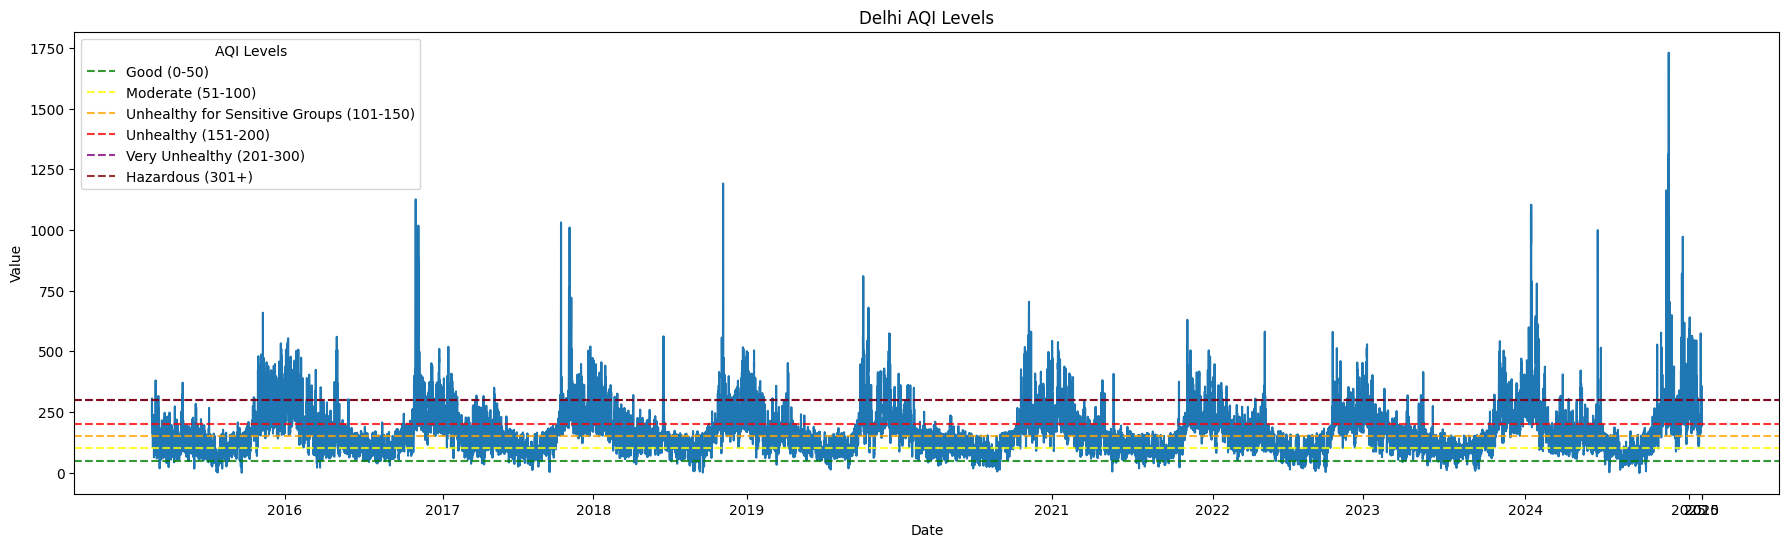

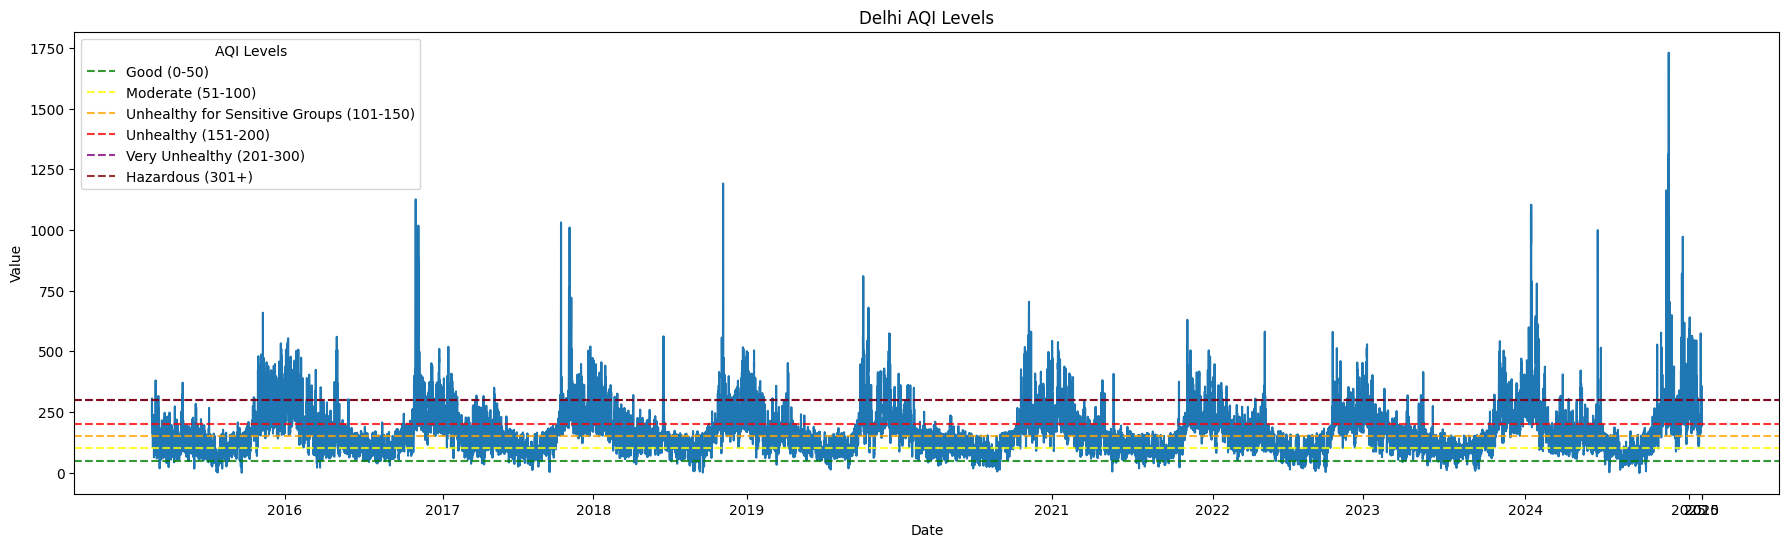

In [5]:
build_AQI_time_graph(delhi_df, "Delhi AQI Levels")

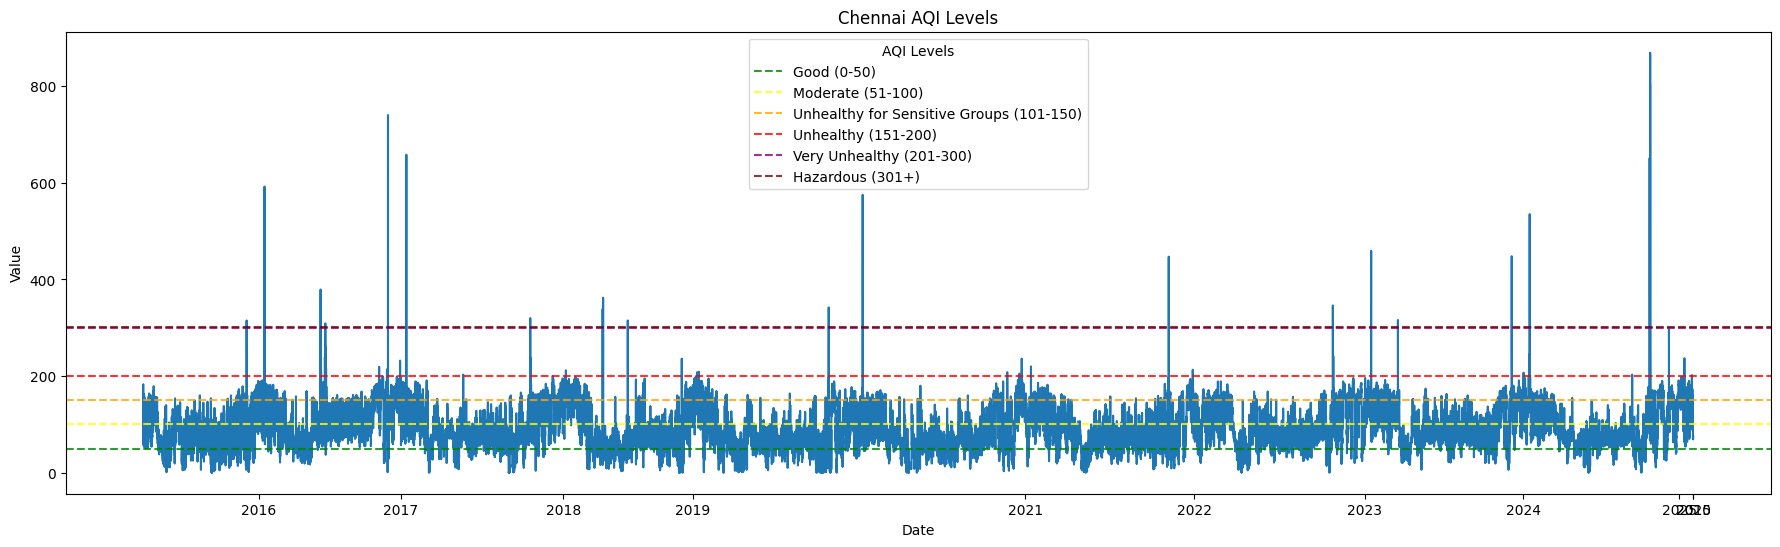

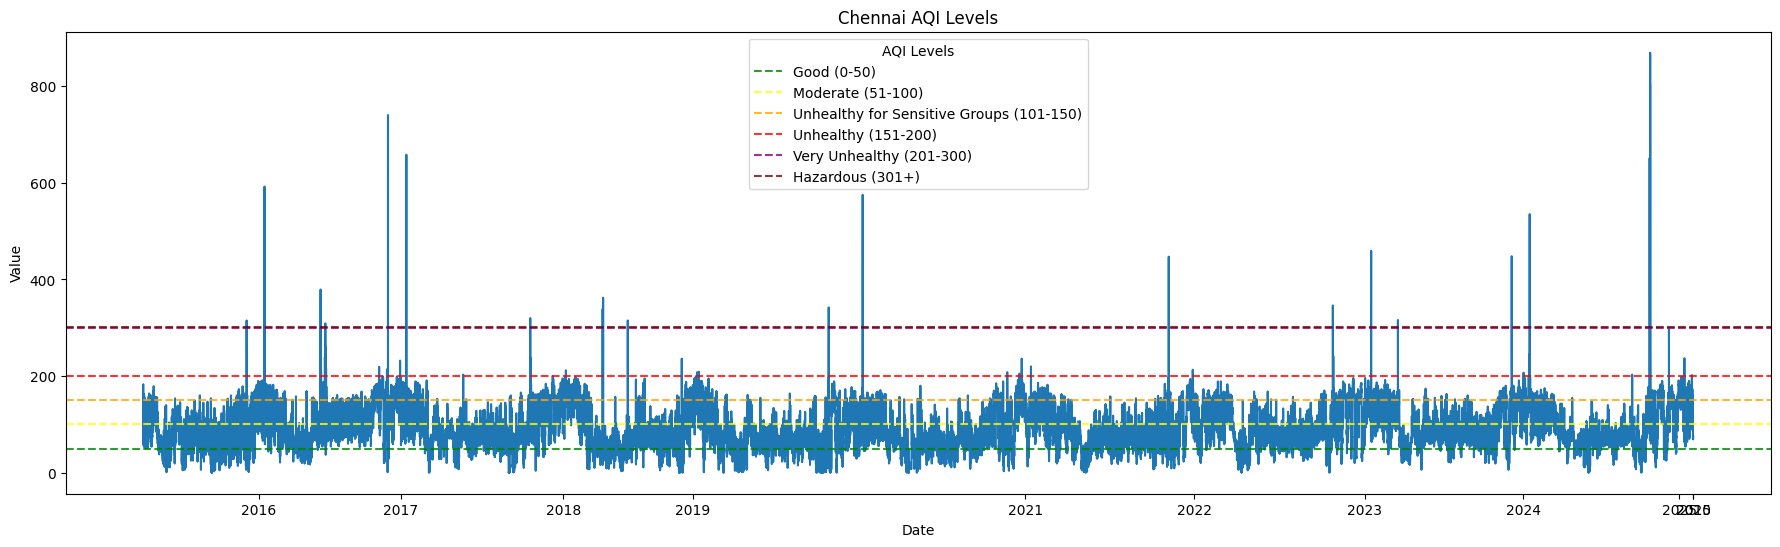

In [6]:
build_AQI_time_graph(chennai_df, "Chennai AQI Levels")

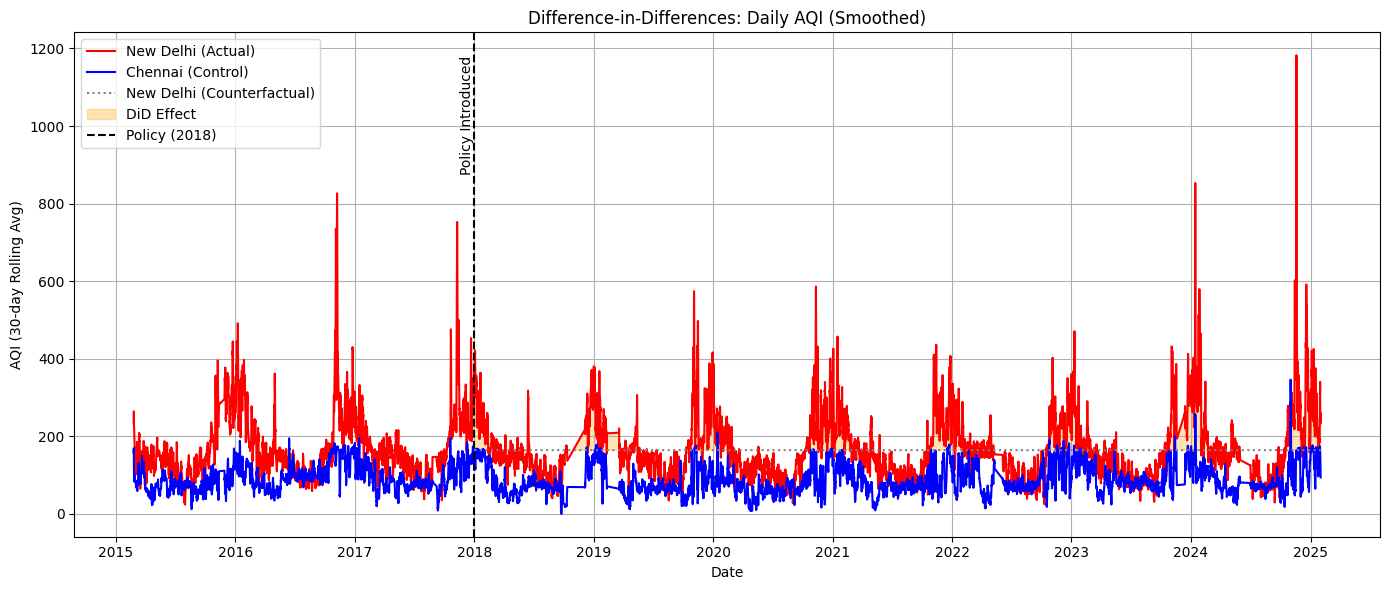

In [7]:
delhi_did_model = build_DiD_graph(delhi_df, chennai_df)
delhi_did_model

In [8]:
delhi_did = build_DiD_model(delhi_df, chennai_df)

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:57:51   Log-Likelihood:            -9.3410e+05
No. Observations:              163067   AIC:                         1.868e+06
Df Residuals:                  163063   BIC:                         1.868e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.3971      0.507    182.311      0.0